In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
SIMULATION_OUTPUT="/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project"

In [3]:
import pandas as pd
from pathlib import Path
import itertools

In [4]:
#results are split in two files
RELATIVE_FILE_PATHS=["results/output_sar_neural.vcsv"]

In [5]:
filepaths = [Path(SIMULATION_OUTPUT)/filepath for filepath in RELATIVE_FILE_PATHS]

In [6]:
chunks_list = [[9,8,7,6,5,4,3,2,1,0]]

In [7]:
def generate_headers(number, prefix):
    return ["".join([prefix,"_",str(number)]),str(number)]

def generate_list_headers(numbers):
    return [generate_headers(number, "time") for number in numbers]

In [8]:
def get_df(filepath, header):
    df = pd.read_csv(filepath, comment=';', header=None, 
                 names=header)
    return df[header].copy()

In [9]:
df_list = []
for filepath, chunks in zip(filepaths, chunks_list):
    header_list = generate_list_headers(chunks)
    flat_list = list(itertools.chain(*header_list))
    df_list.append(get_df(filepath,flat_list))

In [10]:
df=pd.concat(df_list, axis=1)

In [11]:
#come from 7_Export_signals
start_times=[ 0.0,
 0.99915,
 1.999,
 2.9937,
 3.99875,
 4.99575,
 5.9998,
 6.98785,
 8.0024,
 8.99575 ]

end_times=[0.9991,
 0.9998,
 0.99465,
 1.005,
 0.9969500000000004,
 1.0039999999999996,
 0.9880000000000004,
 1.0145,
 0.9932999999999996,
 1.0042000000000009]

In [12]:
rounded_end_times=[round(end_time,5) for end_time in end_times]

In [13]:
ndf = df.copy()
delay = 50e-6
for i, start_time in enumerate(start_times):
    ndf[f"time_{str(i)}"] = df[f"time_{str(i)}"] - delay + start_time
ndf = ndf.drop([0]).reset_index(drop=True)
ndf

,time_9,9,time_8,8,time_7,7,time_6,6,time_5,5,time_4,4,time_3,3,time_2,2,time_1,1,time_0,0
0,8.99575,0.000000,8.00240,0.000000,6.98785,0.000000,5.99980,0.000000,4.99575,0.000000,3.99875,0.000000,2.99370,0.000000,1.99900,0.000000,0.99915,0.000000,0.00000,0.000000
1,8.99580,-0.004687,8.00245,0.000000,6.98790,-0.004687,5.99985,0.000000,4.99580,-0.004687,3.99880,-0.004687,2.99375,-0.004687,1.99905,-0.004687,0.99920,-0.004687,0.00005,0.000000
2,8.99585,-0.004687,8.00250,-0.004687,6.98795,-0.014063,5.99990,0.000000,4.99585,-0.004687,3.99885,0.000000,2.99380,-0.004687,1.99910,-0.004687,0.99925,-0.004687,0.00010,0.004687
3,8.99590,0.000000,8.00255,0.004687,6.98800,-0.004687,5.99995,-0.004687,4.99590,-0.004687,3.99890,0.004687,2.99385,-0.018750,1.99915,0.000000,0.99930,-0.018750,0.00015,0.000000
4,8.99595,0.009375,8.00260,-0.009375,6.98805,0.000000,6.00000,0.004687,4.99595,-0.004687,3.99895,0.009375,2.99390,-0.014063,1.99920,0.004687,0.99935,0.000000,0.00020,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20286,10.01005,0.000000,9.01670,0.000000,8.00215,-0.018750,7.01410,-0.004687,6.01005,0.000000,5.01305,-0.004687,4.00800,0.000000,3.01330,-0.004687,2.01345,-0.004687,1.01430,-0.004687
20287,10.01010,0.000000,9.01675,0.000000,8.00220,-0.004687,7.01415,-0.004687,6.01010,0.000000,5.01310,-0.004687,4.00805,0.000000,3.01335,-0.004687,2.01350,-0.004687,1.01435,-0.004687
20288,10.01015,0.000000,9.01680,0.000000,8.00225,0.000000,7.01420,-0.004687,6.01015,0.000000,5.01315,-0.004687,4.00810,0.000000,3.01340,-0.004687,2.01355,-0.004687,1.01440,-0.004687
20289,10.01020,0.000000,9.01685,0.000000,8.00230,-0.004687,7.01425,-0.004687,6.01020,0.000000,5.01320,-0.004687,4.00815,0.000000,3.01345,-0.004687,2.01360,-0.004687,1.01445,-0.004687


In [14]:
import numpy as np

In [15]:
list_df_chunks = []
tolerance = 50e-6/2
for i, end_time in enumerate(rounded_end_times):
    seldf = ndf[[f"time_{i}",str(i)]].copy()
    absolute_end_time = seldf[f"time_{i}"][0] + end_time
    index = seldf.loc[np.abs(ndf[f"time_{i}"]-absolute_end_time)<tolerance].index.values[0]
    list_df_chunks.append(seldf.iloc[0:index+1].rename(columns={f"time_{i}": "time", str(i): "vout"}))
list_df_chunks

[          time      vout
 0      0.00000  0.000000
 1      0.00005  0.000000
 2      0.00010  0.004687
 3      0.00015  0.000000
 4      0.00020 -0.023438
 ...        ...       ...
 19978  0.99890  0.004687
 19979  0.99895 -0.009375
 19980  0.99900  0.000000
 19981  0.99905  0.000000
 19982  0.99910 -0.004687
 
 [19983 rows x 2 columns],
           time      vout
 0      0.99915  0.000000
 1      0.99920 -0.004687
 2      0.99925 -0.004687
 3      0.99930 -0.018750
 4      0.99935  0.000000
 ...        ...       ...
 19992  1.99875  0.000000
 19993  1.99880 -0.009375
 19994  1.99885  0.009375
 19995  1.99890  0.004687
 19996  1.99895 -0.004687
 
 [19997 rows x 2 columns],
           time      vout
 0      1.99900  0.000000
 1      1.99905 -0.004687
 2      1.99910 -0.004687
 3      1.99915  0.000000
 4      1.99920  0.004687
 ...        ...       ...
 19889  2.99345 -0.004687
 19890  2.99350 -0.004687
 19891  2.99355 -0.004687
 19892  2.99360 -0.009375
 19893  2.99365 -0.004687
 
 [19

In [16]:
rdf = pd.concat(list_df_chunks)

In [17]:
len(rdf)

200000

In [18]:
import matplotlib.pyplot as plt

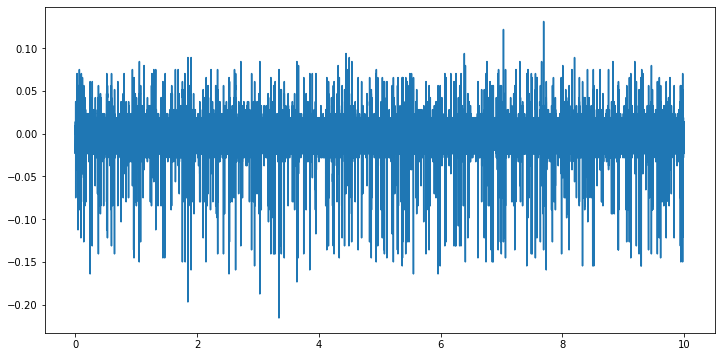

In [19]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(rdf["time"],rdf["vout"])

In [20]:
BASE_PATH = "/mnt/Data/data"
base_dir = Path(BASE_PATH).resolve()

config = {
    "config_folder": "../data/mearec",
    "recordings_folder": str(base_dir / "output/recordings"),
    "templates_folder": str(base_dir / "output/templates")
}
channel_indexes=[21,27]
fs_list = [24000, 20000, 16000]
noise_levels = [5, 10, 15, 25]
nthresholds = 50

In [21]:
from eapprocessor.mearec.api import generate_templates, generate_recordings, load_recordings

In [22]:
all_recgen_list = [[load_recordings(datafolder=config["recordings_folder"],
                verbose=True, noise_level=noise_level, fs=fs) for noise_level in noise_levels]
               for fs in fs_list]
recordings_20khz = all_recgen_list[1]
recgen=recordings_20khz[0]

Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_5uV_24000Hz_2021-12-02_10-59.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_10uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_15uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_25uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_5uV_20000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_10uV_20000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Da

In [23]:
recordings = recgen.recordings[:].T
timestamps = np.array(recgen.timestamps)

selected = recordings[channel_indexes[1]]
odf = pd.DataFrame({"time":timestamps,"vout":selected})

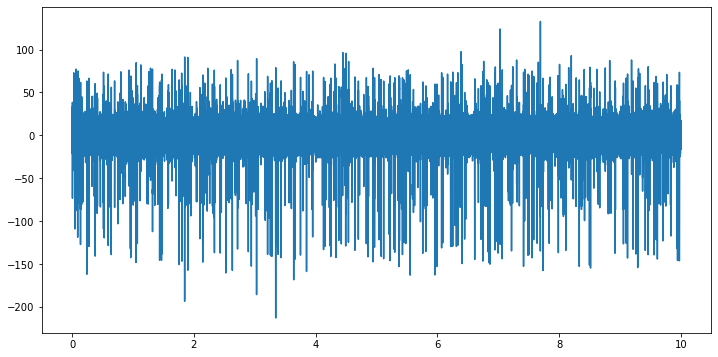

In [24]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(odf["time"],odf["vout"])

In [25]:
from eapprocessor.plot import set_tex_enabled, save_figure
set_tex_enabled(True)

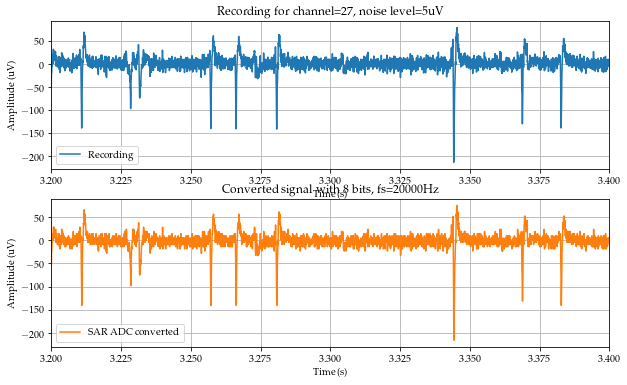

In [26]:
t_start=3.2
t_stop=3.4
channel=channel_indexes[1]
fs=fs_list[1]
noise=noise_levels[0]

scales=[1,1000]
labels=["Recording","SAR ADC converted"]
titles=[f"Recording for channel={channel}, noise level={noise}uV",
        f"Converted signal with 8 bits, fs={fs}Hz"]
df_list=[odf, rdf]

fig=plt.figure(figsize=(10,6))
for i, cdf, scale, label, title in zip(range(len(df_list)), df_list, scales, labels, titles):
    scope_df=cdf.loc[(cdf["time"]>=t_start)&(cdf["time"]<=t_stop)]
    ax=fig.add_subplot(2,1,i+1)
    ax.plot(scope_df["time"], scope_df["vout"]*scale, f"C{i}",label=label)
    ax.set_xlim([t_start, t_stop])
    ax.grid(True)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude (uV)")
    ax.set_title(title)
    ax.legend(loc="best")
    

In [27]:
FIGURE_FOLDER = "/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/thesis/images"
figure_path = Path(FIGURE_FOLDER)

In [28]:
save_figure(fig, figure_path / "hw_original_converted_time.pdf")

In [29]:
from eapprocessor.tools.fft import fft

In [30]:
Fs=20e3

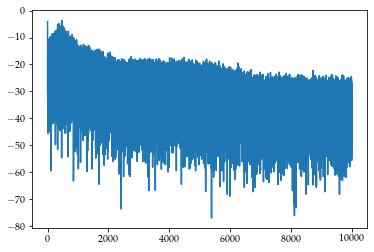

In [31]:
xf, yf = fft(np.array(odf["vout"]), Fs)
plt.plot(xf,10*np.log10(np.power(yf,2)))

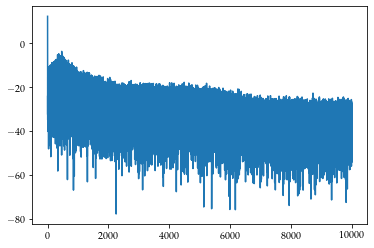

In [32]:
xf1, yf1 = fft(np.array(rdf["vout"])*1000, Fs)
plt.plot(xf1,10*np.log10(np.power(yf1,2)))

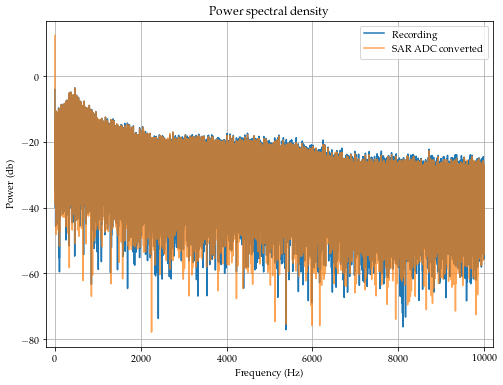

In [33]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(xf,10*np.log10(np.power(yf,2)), label="Recording")
ax.plot(xf1,10*np.log10(np.power(yf1,2)), label="SAR ADC converted",alpha=0.7)
ax.legend()
ax.grid(True)
ax.set_xlim([-Fs/100, max(max(xf),max(xf1)) + Fs/100])
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power (db)")
ax.set_title("Power spectral density")
ax.legend(loc="best")

In [34]:
save_figure(fig, figure_path / "hw_original_converted_frequency.pdf")